In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_excel(r"C:\Users\DELL\Desktop\DS\csv\Toyota.xlsx")
df = pd.DataFrame(data)

In [17]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1436 non-null   int64  
 1   Model             1436 non-null   object 
 2   Price             1436 non-null   int64  
 3   Age_08_04         1436 non-null   int64  
 4   Mfg_Month         1436 non-null   int64  
 5   Mfg_Year          1436 non-null   int64  
 6   KM                1436 non-null   int64  
 7   Fuel_Type         1436 non-null   object 
 8   HP                1434 non-null   float64
 9   Met_Color         1436 non-null   int64  
 10  Color             1436 non-null   object 
 11  Automatic         1436 non-null   int64  
 12  cc                1436 non-null   int64  
 13  Doors             1436 non-null   int64  
 14  Cylinders         1436 non-null   int64  
 15  Gears             1436 non-null   int64  
 16  Quarterly_Tax     1436 non-null   int64  


In [20]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  2
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [4]:
df1 = df.drop(['Id','Model','Color','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Automatic','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'], axis = 1)

In [5]:
df1


,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,4,5,210,1165
1,13750,23,72937,90.0,2000,3,4,5,210,1165
2,13950,24,41711,90.0,2000,3,4,5,210,1165
3,14950,26,48000,90.0,2000,3,4,5,210,1165
4,13750,30,38500,90.0,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,4,5,69,1025
1432,10845,72,19000,86.0,1300,3,4,5,69,1015
1433,8500,71,17016,86.0,1300,3,4,5,69,1015
1434,7250,70,16916,86.0,1300,3,4,5,69,1015


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1434 non-null   float64
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Cylinders      1436 non-null   int64  
 7   Gears          1436 non-null   int64  
 8   Quarterly_Tax  1436 non-null   int64  
 9   Weight         1436 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 112.3 KB


In [7]:
df1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               2
cc               0
Doors            0
Cylinders        0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
mean = df1['HP'].mean()
print(mean)

101.51324965132497


In [9]:
df1['HP'] = df1['HP'].fillna(mean)

In [10]:
df1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Cylinders        0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [11]:
df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116.0,2000,5,4,5,234,1320


In [223]:
df2 = df1.drop_duplicates()
df2

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,4,5,210,1165
1,13750,23,72937,90.0,2000,3,4,5,210,1165
2,13950,24,41711,90.0,2000,3,4,5,210,1165
3,14950,26,48000,90.0,2000,3,4,5,210,1165
4,13750,30,38500,90.0,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,4,5,69,1025
1432,10845,72,19000,86.0,1300,3,4,5,69,1015
1433,8500,71,17016,86.0,1300,3,4,5,69,1015
1434,7250,70,16916,86.0,1300,3,4,5,69,1015


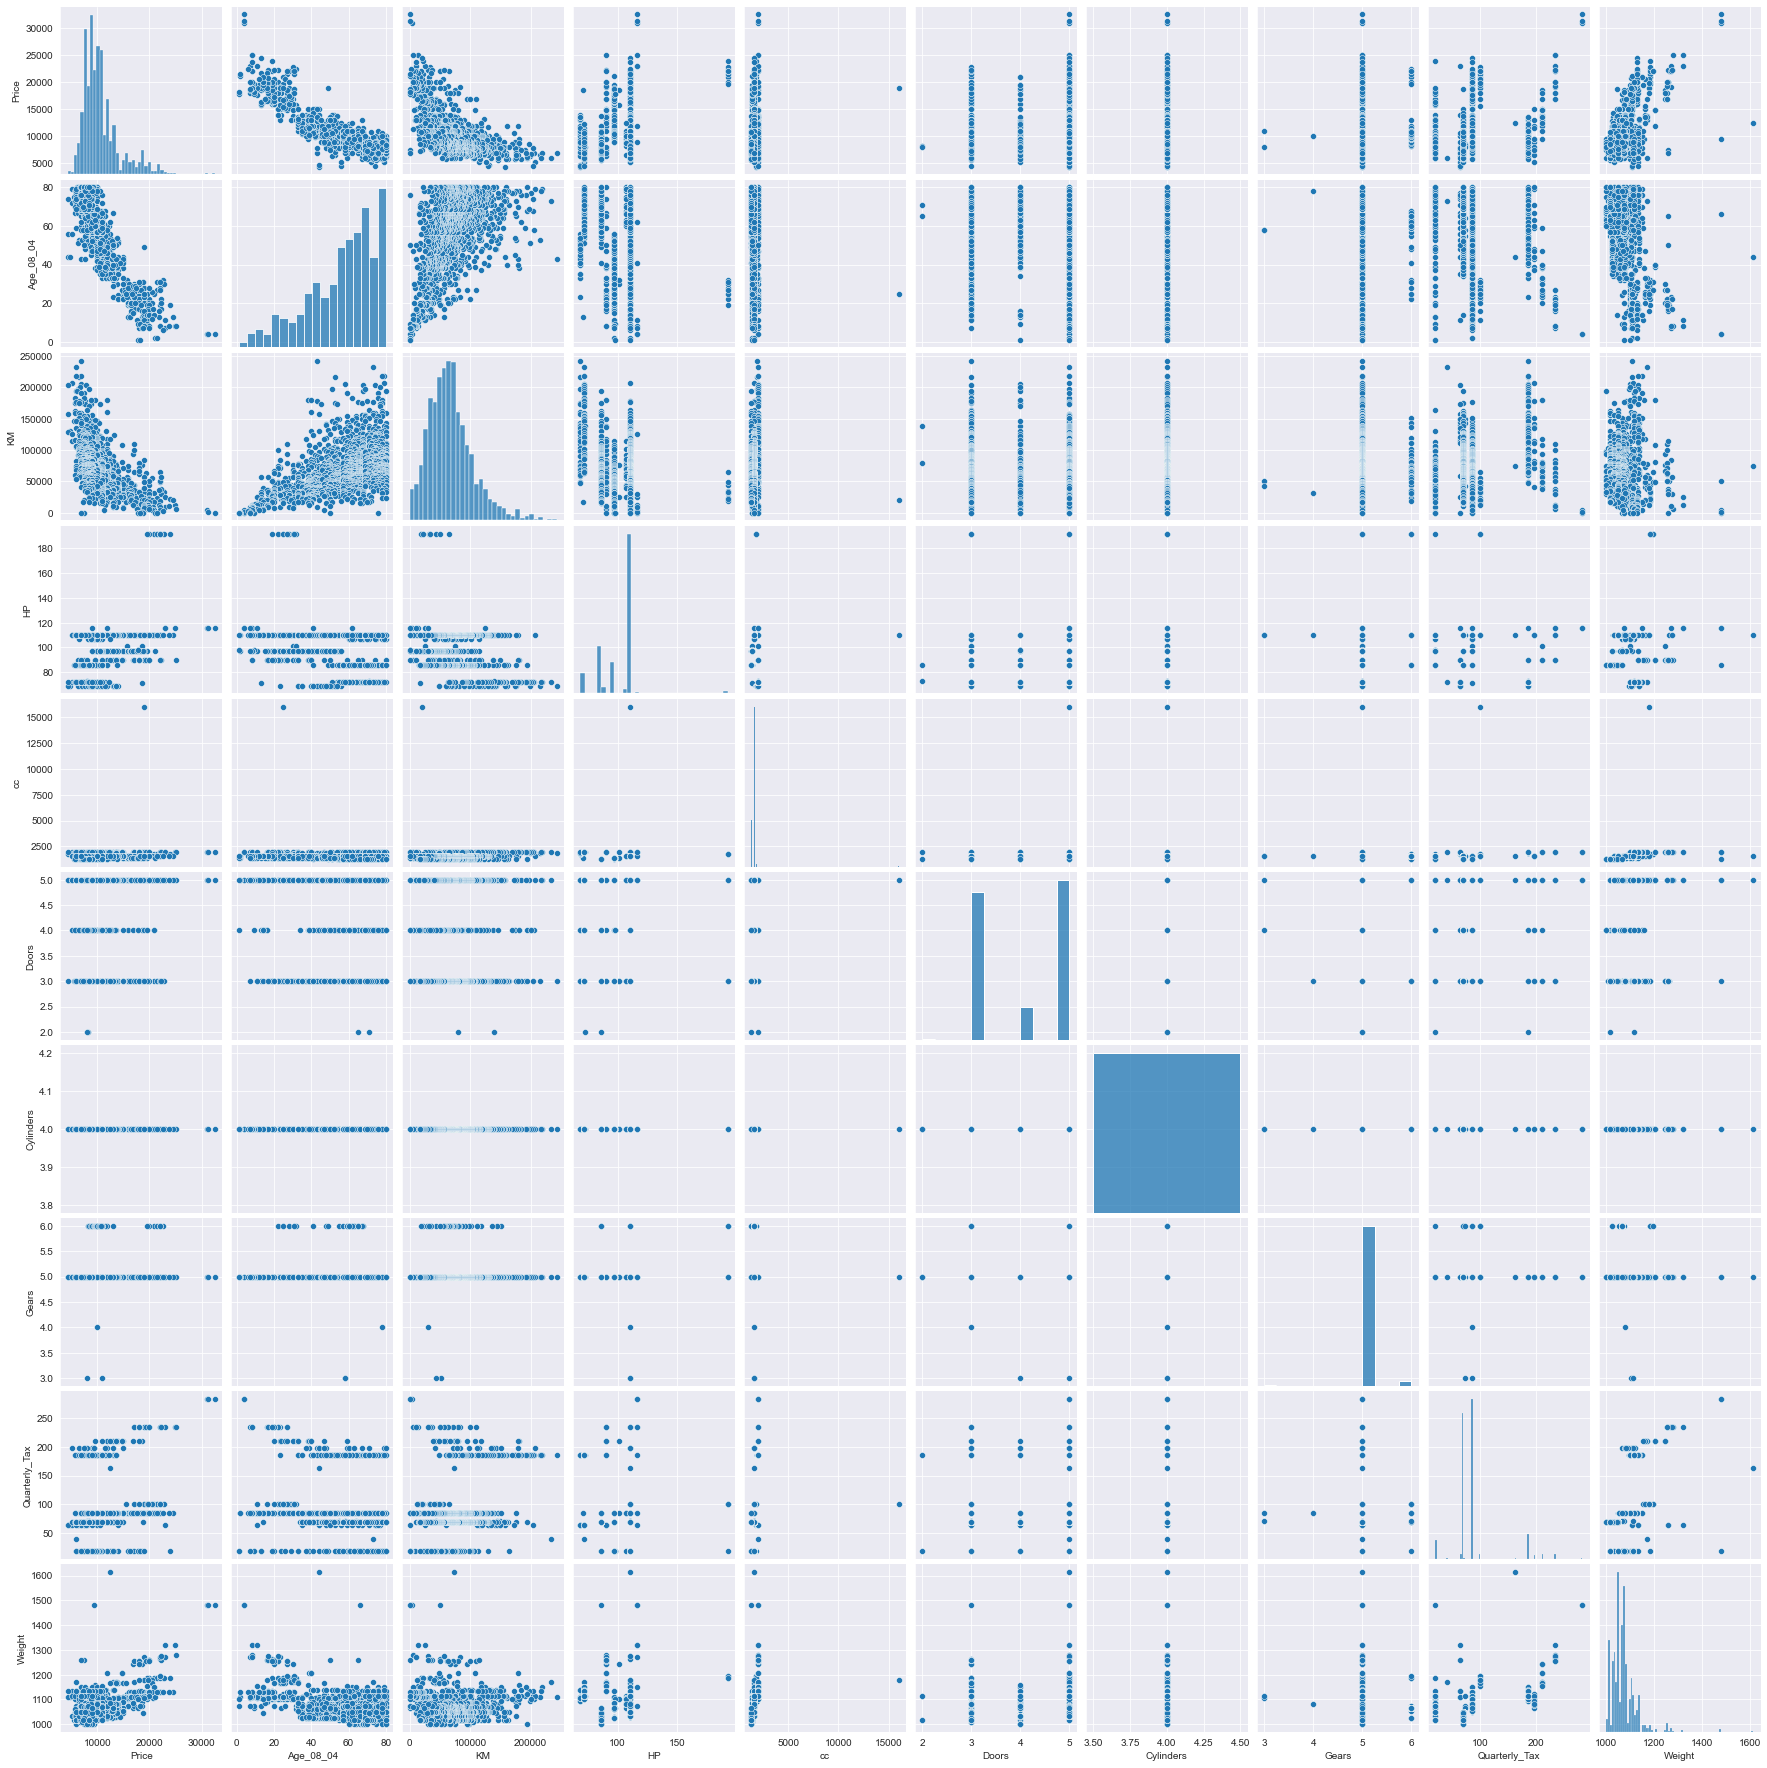

In [16]:
import seaborn as sns
# Create the default pairplot
sns.set_style(style='darkgrid')
sns.pairplot(df2)

In [17]:
df2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.315672,0.124375,0.183604,NaN,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.156352,-0.096549,-0.146929,NaN,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.333121,0.103822,-0.035193,NaN,0.014890,0.283312,-0.023969
HP,0.315672,-0.156352,-0.333121,1.000000,0.035662,0.091016,NaN,0.209587,-0.300760,0.089047
cc,0.124375,-0.096549,0.103822,0.035662,1.000000,0.079254,NaN,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091016,0.079254,1.000000,NaN,-0.160101,0.107353,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209587,0.014732,-0.160101,NaN,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.300760,0.305982,0.107353,NaN,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.089047,0.335077,0.301734,NaN,0.021238,0.621988,1.000000


In [18]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:56:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -320.7673     83.054     -3.862      0.000    -483.688    -157.846
Age_08_04      -121.7153      2.614    -46.566      0.000    -126.843    -116.588
KM               -0.0207      0.001    -16.546      0.000      -0.023      -0.018
HP               31.6924      2.817     11.250      0.000      26.166      37.218
cc               -0.1186      0.090     -1.317      0.188      -0.295       0.058
Doors            -0.2608     39.972     -0.007      0.995     -78.671      78.149
Cylinders     -1283.0692    332.216     -3.862      0.000   -1934.753    -631.386
Gears           596.8622    196.893      3.031      0.002     210.632     983.092
Quarterly_Tax     3.8700      1.310      2.954      0.003       1.300       6.440
Weight           16.8267      1.070     15.732      0.000      14.729      18.925
==============================================================================
Omnibus:                      149.145   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.235
Skew:                          -0.201   Prob(JB):                    4.68e-217
Kurtosis:                       7.062   Cond. No.                     1.54e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
model1 = smf.ols('Price~Doors',data=df2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.40e-12
Time:                        14:12:16   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model2 = smf.ols('Price~cc',data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.29e-06
Time:                        08:56:26   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model3 = smf.ols('Price~cc+Doors',data=df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.55e-15
Time:                        14:15:38   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_age = smf.ols('Age_08_04~HP+KM+cc+Doors+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('Doors~Age_08_04+KM+cc+HP+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_cyl = smf.ols('Cylinders~Age_08_04+KM+cc+Doors+HP+Gears+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_cyl = 1/(1-rsq_cyl)

rsq_gears = smf.ols('Gears~Age_08_04+KM+cc+Doors+Cylinders+HP+Quarterly_Tax+Weight',data=df2).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+cc+Doors+Cylinders+Gears+HP+Weight',data=df2).fit().rsquared  
vif_qt = 1/(1-rsq_qt) 

rsq_wt = smf.ols('Weight~Age_08_04+KM+cc+Doors+Cylinders+Gears+Quarterly_Tax+HP',data=df2).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 


# Storing vif values in a data frame
d1 = {'Variables':['HP','Age_08_04','KM','cc','Doors','Cylinders','Gears','Quarterly_Tax','Weight'],'VIF':[vif_hp,vif_age,vif_km,vif_cc,vif_doors,vif_cyl,vif_gears,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,HP,1.418824
1,Age_08_04,1.876224
2,KM,1.757350
3,cc,1.163407
4,Doors,1.155614
5,Cylinders,0.000000
6,Gears,1.098626
7,Quarterly_Tax,2.294543
8,Weight,2.489191


In [23]:
fmodel = smf.ols('Price~Age_08_04+KM+HP+np.log(cc)+np.log(Doors)+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit()
fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:56:46   Log-Likelihood:                -12349.
No. Observations:                1435   AIC:                         2.472e+04
Df Residuals:                    1426   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       489.7779    156.973      3.120      0.002     181.856     797.700
Age_08_04      -121.1968      2.584    -46.898      0.000    -126.266    -116.127
KM               -0.0192      0.001    -15.182      0.000      -0.022      -0.017
HP               36.7962      2.917     12.615      0.000      31.074      42.518
np.log(cc)    -2245.8000    372.996     -6.021      0.000   -2977.480   -1514.120
np.log(Doors)   -27.8013    154.095     -0.180      0.857    -330.078     274.475
Cylinders      1959.1115    627.891      3.120      0.002     727.422    3190.801
Gears           552.7081    194.813      2.837      0.005     170.558     934.858
Quarterly_Tax     6.4401      1.365      4.719      0.000       3.763       9.117
Weight           18.6235      1.095     17.012      0.000      16.476      20.771
==============================================================================
Omnibus:                      191.026   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1775.238
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                       8.425   Cond. No.                     1.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
f_model = smf.ols('Price~Age_08_04+KM+HP+np.log(cc)+Cylinders+Gears+Quarterly_Tax+Weight',data=df2).fit()
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:57:13   Log-Likelihood:                -12349.
No. Observations:                1435   AIC:                         2.471e+04
Df Residuals:                    1427   BIC:                         2.476e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       487.6357    156.470      3.116      0.002     180.700     794.572
Age_08_04      -121.1955      2.583    -46.913      0.000    -126.263    -116.128
KM               -0.0192      0.001    -15.204      0.000      -0.022      -0.017
HP               36.7534      2.906     12.646      0.000      31.052      42.454
np.log(cc)    -2243.0949    372.568     -6.021      0.000   -2973.936   -1512.254
Cylinders      1950.5427    625.880      3.116      0.002     722.799    3178.286
Gears           559.5102    191.065      2.928      0.003     184.712     934.308
Quarterly_Tax     6.4541      1.362      4.738      0.000       3.782       9.126
Weight           18.5750      1.061     17.509      0.000      16.494      20.656
==============================================================================
Omnibus:                      189.782   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1752.675
Skew:                          -0.253   Prob(JB):                         0.00
Kurtosis:                       8.390   Cond. No.                     1.42e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

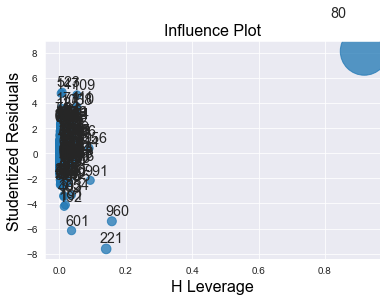

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

plt.show()

In [28]:
model_influence_V = f_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

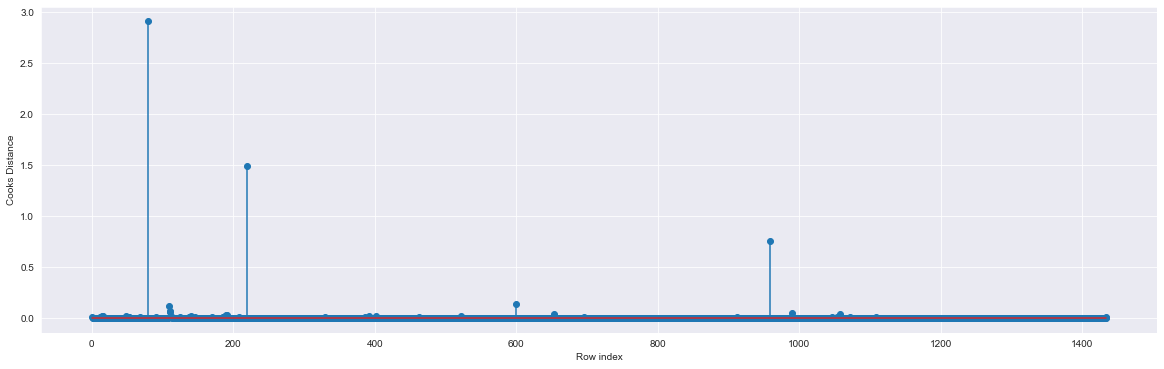

In [29]:
fig= plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(df2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [30]:
(np.argmax(c_V),np.max(c_V))

(80, 2.903053890361099)

In [31]:
df2[df2.index.isin([80, 211])]

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110.0,16000,5,4,5,100,1180
211,14750,40,80425,90.0,2000,5,4,5,210,1205


In [32]:
df2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,4,5,210,1165
1,13750,23,72937,90.0,2000,3,4,5,210,1165
2,13950,24,41711,90.0,2000,3,4,5,210,1165
3,14950,26,48000,90.0,2000,3,4,5,210,1165
4,13750,30,38500,90.0,2000,3,4,5,210,1170


In [35]:
df3 = df2.drop(df2.index[[80,211]],axis=0).reset_index()

In [36]:
df4 = df3.reset_index()

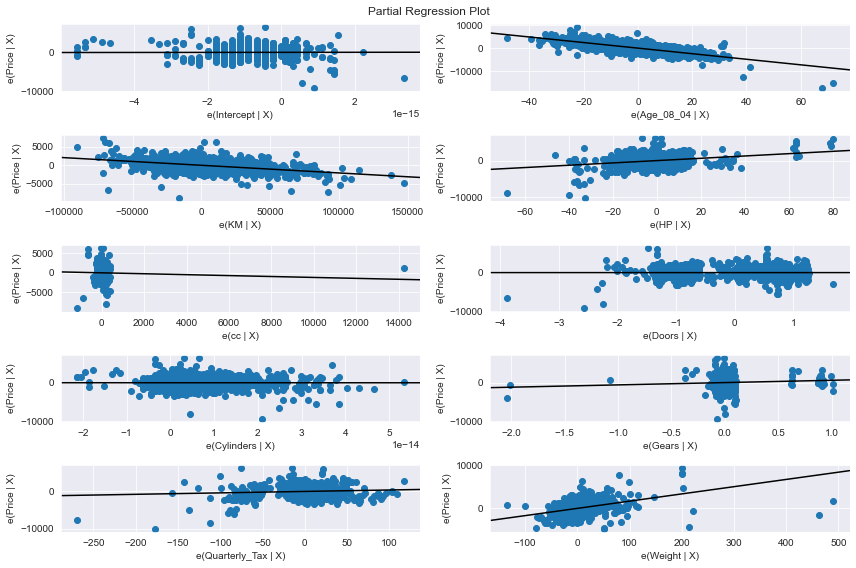

In [46]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)                  #by this we can ignore Doors
plt.show()

In [37]:
f_model_1 = smf.ols('Price~Age_08_04+KM+HP+np.log(cc)+Cylinders+Gears+Quarterly_Tax+Weight',data=df4).fit()
f_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:58:22   Log-Likelihood:                -12311.
No. Observations:                1433   AIC:                         2.464e+04
Df Residuals:                    1425   BIC:                         2.468e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1187.0509    189.635      6.260      0.000     815.058    1559.044
Age_08_04      -120.7895      2.551    -47.355      0.000    -125.793    -115.786
KM               -0.0176      0.001    -13.843      0.000      -0.020      -0.015
HP               41.5776      2.963     14.034      0.000      35.766      47.389
np.log(cc)    -4140.2441    473.844     -8.738      0.000   -5069.751   -3210.737
Cylinders      4748.2037    758.539      6.260      0.000    3260.231    6236.177
Gears           527.0038    188.447      2.797      0.005     157.340     896.668
Quarterly_Tax     9.0297      1.405      6.428      0.000       6.274      11.785
Weight           19.8490      1.065     18.639      0.000      17.760      21.938
==============================================================================
Omnibus:                      238.558   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.921
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                       9.519   Cond. No.                     1.22e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

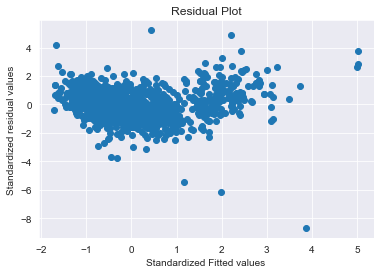

In [38]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(f_model_1.fittedvalues),
            get_standardized_values(f_model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# PREDICTIONS

In [47]:
pred_y = f_model_1.predict(df)

In [48]:
pred_y

0       16503.312306
1       16047.046489
2       16475.266888
3       16123.115780
4       15906.229903
            ...     
1431     8977.087456
1432     8443.375402
1433     8599.047254
1434     8721.594956
1435     9946.004012
Length: 1436, dtype: float64

# CROSS VALIDATION

In [222]:
# rmse of the data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+np.log(cc)+Cylinders+Gears+Quarterly_Tax+Weight',data = df).fit()

pred=final_ml_V.predict(df)
actual=df.Price
errors=actual-pred
errors.mean()
rmse=np.sqrt(np.mean(errors**2))
rmse

1322.0560410868707

In [214]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(df,test_size=0.3)

In [215]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [220]:
#rmse of the train data
train_model=smf.ols("Price~Age_08_04+KM+HP+np.log(cc)+Cylinders+Gears+Quarterly_Tax+Weight",data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Price
errors_train=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

1301.3020229482324

In [221]:
train_model=smf.ols("Price~Age_08_04+KM+HP+np.log(cc)+Cylinders+Gears+Quarterly_Tax+Weight",data= train_data).fit()
predtest=train_model.predict(test_data)
actualtest=test_data.Price
errors_test=predtest-actualtest                                 
rmse_test=RMSE(predtest,actualtest)
rmse_test

1389.2506980975443